# HW 11 - Fall Semester Review
ULAB - Physics and Astronomy Division \
Due **Sunday, February 2nd, 2025 at 11:59pm** on Gradescope

To prepare for next week’s homework, where we’ll explore exoplanets using **pandas**, this assignment will review fundamental Python concepts within the same theme. 

## 0 Academic Integrity
Please type the following message in the cell below as a comment. Sign with your name.

------
**I certify that I did not use AI tools, such as ChatGPT, to generate or write code for this assignment. All work submitted is my own and reflects my understanding of the material.**

------

In [2]:
# I certify that I did not use AI tools such as ChatGPT, to generate or write code for this assignment. All work submitted is my own and reflects my understanding of the material.

## 1 Functions
**Orbital Periods and Kepler's Third Law** \
Kepler's Third Law states that the square of the orbital period $T$ (in years) of a planet is proportional to the cube of the semi-major axis $a$ (in astronomical units, AU):

$$
T^2 = a^3
$$

Write a **function** that calculates the orbital period $T$ given the semi-major axis $a$. (So, you can assume that $T = \sqrt{a^3}$.)

In [3]:
# Your code here (WITHOUT NUMPY! or any other modules/libraries/packages)

def orbital_period(a): # This function, given a distance "a" from a star, will calculate the orbital period of a planet
    distance = a ** 3
    period = distance ** 0.5
    return period


Call your function with the following values: 
* `planet_a` $ = 0.5\,\text{AU}$
* `planet_b` $ = 1.0\,\text{AU}$
* `planet_c` $ = 1.5\,\text{AU}$

In [4]:
planet_a = 0.5
planet_b = 1.0
planet_c = 1.5

result1 = orbital_period(planet_a)
print(result1)

result2 = orbital_period(planet_b)
print(result2)

result3 = orbital_period(planet_c)
print(result3)

0.3535533905932738
1.0
1.8371173070873836


Import `numpy` in the cell below.

In [5]:
import numpy as np

How many times do you need to call numpy in a jupyter notebook? Why?

In [6]:
# You should call Numpy only once in your Jupyter notebook, preferably at the top of the page.
# This is because once you run it in a notebook, the Numpy library will be available for all future code cells.

Rewrite your **function** from above with a `numpy` function. 

In [7]:
def new_orbital_period(a):
    period = np.sqrt(np.power(a, 3)) # Does the same thing as the function above, however now uses numpy functions instead of straight arithmetic.
    return period

x = new_orbital_period(planet_a)
print(x) 

0.3535533905932738


Import the `time` package in the cell below.

In [8]:
import time

Call both of your functions in the cell below with ($a$ = 5). Time how long it takes each of your functions to run. **DO NOT REWRITE THEM!** 

In [9]:
planet1 = 5

# First function

start_time_first_function = time.perf_counter() # This records the time when we started the clock

orbital_period(planet1) # We run the first function with no numpy

end_time_first_function = time.perf_counter() # This records the time when we ended the clock

elapsed_time_first_function = end_time_first_function - start_time_first_function # This will tell us the difference between those 2 times

print(elapsed_time_first_function)

# Now the second function

start_time_second_function = time.perf_counter() # This records the time when we started the clock

new_orbital_period(planet1) # We run the second function with numpy

end_time_second_function = time.perf_counter() # This records the time when we ended the clock

elapsed_time_second_function = end_time_second_function - start_time_second_function # This will tell us the difference between those 2 times

print(elapsed_time_second_function)

9.620003402233124e-05
0.0001984999980777502


Which function is faster? Why is it faster? What does that tell you about numpy functions?

In [10]:
# The function written with Numpy is faster because the math we need to calculate the orbital period is already made, so we don't have to make them
# ourselves. This tells us that Numpy is made for math calculations compared to regular python.

Define a **list** in the cell below that contains a least 1000 semi-major axis values.

In [11]:
semi_major_axes = np.linspace(1, 2, 1000) # This makes an array of 1000 values for semi-major axis values between 1 and 2 au.

semi_major_axes_list = semi_major_axes.tolist() # This converts the array to a list


With a **for** loop. Time each of your functions again with this new list. 

In [12]:
# First we run the for loop for the first function

start_time_first_function = time.perf_counter() # This records the time when we started the clock

for i in semi_major_axes_list:
    orbital_period(i)

end_time_first_function = time.perf_counter() # This records the time when we ended the clock

elapsed_time_first_function = end_time_first_function - start_time_first_function # This will tell us the difference between those 2 times

print(elapsed_time_first_function)

# Now the second function

start_time_second_function = time.perf_counter() # This records the time when we started the clock

for i in semi_major_axes_list:
    new_orbital_period(i)

end_time_second_function = time.perf_counter() # This records the time when we ended the clock

elapsed_time_second_function = end_time_second_function - start_time_second_function # This will tell us the difference between those 2 times

print(elapsed_time_second_function)

0.0003777000238187611
0.0030536999693140388


Which function is faster? Why is it faster? What does that tell you about numpy functions?

In [13]:
# The regular python function is faster this time around. I am not sure why it is, however if I had to guess I would say it's because every time we 
# run the Numpy function we have to call np.power and np.sqrt each time, which may slow down the process. If this is true, this means that Numpy functions
# are better when we don't have to run simple calculations over and over again (but to me this doesn't make much sense because we use Numpy with for 
# loops all the time). 

## 2 Indexing + Conditionals

You are provided with a list of exoplanet radii (in Earth radii) and their equilibrium temperatures (in Kelvin):

`radii = [1.2, 0.8, 1.5, 2.0, 1.0, 0.6]` \
`temperatures = [300, 400, 350, 280, 500, 450]`

Write a loop to filter and print the radii of planets with temperatures below 350 K.

In [14]:
radii_list = [1.2, 0.8, 1.5, 2.0, 1.0, 0.6]
temp_list = [300, 400, 350, 280, 500, 450]

def return_radii(list_temp, list_radii): # Taking 2 arrays of radii and temperatures, this function returns the radii of the planets below T = 350K
    radii_array = [] # Creates an empty array where we will append the radii values to
    for i in range(len(list_temp)): # Indexes the temperature array into singular discrete values: [0, 1, ..., [last number]]
        if list_temp[i] < 350: # Because our temperature array is now indexed, we have to check the value of temp not by i but by list_temp[i]
            radii_array.append(list_radii[i]) # Whatever i value we are on, we will append that index value of the radii array into our empty array.

    return radii_array

print(return_radii(temp_list, radii_list))

[1.2, 2.0]


Use list slicing to extract and print the radii of the first three planets.

In [15]:
first_three_radii = radii_list[:3] # This says to extract the elements from the list up to element 3, but not including element 3, so only elements 0,1,2
print(first_three_radii)

[1.2, 0.8, 1.5]


Turn the radii and temperatures data into a dictionary. 

In [16]:
radii = [1.2, 0.8, 1.5, 2.0, 1.0, 0.6]
temperatures = [300, 400, 350, 280, 500, 450]

temp_and_radii_dict = dict(zip(radii, temperatures)) # I used the zip function to avoid having to pair items individually. Zip will pair elements of the same index from 2 separate lists. 
print(temp_and_radii_dict)

{1.2: 300, 0.8: 400, 1.5: 350, 2.0: 280, 1.0: 500, 0.6: 450}


Give each of the planets in your dictionary a name. 

In [17]:
radii = [1.2, 0.8, 1.5, 2.0, 1.0, 0.6]
temperatures = [300, 400, 350, 280, 500, 450]
names = ["Bob", "Maddie", "Gael", "Jonathan", "Seth", "Tariq"]

named_planets_dataset = dict(zip(names, zip(radii, temperatures))) # Creates a big dictionary with 2 zip calls so we can put 3 variable into our dictionary: name, radius and temperature.
print(named_planets_dataset)

{'Bob': (1.2, 300), 'Maddie': (0.8, 400), 'Gael': (1.5, 350), 'Jonathan': (2.0, 280), 'Seth': (1.0, 500), 'Tariq': (0.6, 450)}


Create a new dictionary of planets with radii between 1.0 and 2.0 Earth radii (inclusive).

In [18]:
radii = [1.2, 0.8, 1.5, 2.0, 1.0, 0.6]
names = ["Bob", "Maddie", "Gael", "Jonathan", "Seth", "Tariq"]

planets_in_range = dict(zip(names, radii)) # Makes a dictionary with all the planets

del planets_in_range["Maddie"] # Deletes the one with 0.8 earth radius
del planets_in_range["Tariq"] # Deletes the one with 0.6 earth radius

print(planets_in_range)

{'Bob': 1.2, 'Gael': 1.5, 'Jonathan': 2.0, 'Seth': 1.0}


## 3 NumPy
With your 1,000,000 semi-major axes list from Problem 1, convert it to a `numpy` array. 

In [19]:
import numpy as np

semi_major_axes_array = np.linspace(1, 2, 1000) # Makes an array of 1000 values evenly spaced between 1 and 2

With `numpy` find the mean, median, minimum and maximum.

In [20]:
print(np.mean(semi_major_axes_array))
print(np.median(semi_major_axes_array))
print(np.min(semi_major_axes_array))
print(np.max(semi_major_axes_array))

1.5
1.5
1.0
2.0


Google another `numpy` function and apply it to your data. Explain what it does in a comment.

In [21]:
np.std(semi_major_axes_array) #This calculates the standard deviation for my data set

0.2889639542114209

Turn the radii and temperatures from Problem 2 into a multi-dimensional array.

In [22]:
radii = [1.2, 0.8, 1.5, 2.0, 1.0, 0.6]
temperatures = [300, 400, 350, 280, 500, 450]

planets_data = np.array([radii, temperatures]) # Converts these 2 distinct arrays into one numpy array

print(planets_data)

[[  1.2   0.8   1.5   2.    1.    0.6]
 [300.  400.  350.  280.  500.  450. ]]


Use a for loop to print the value on the second row, third column. 

In [23]:
radii = [1.2, 0.8, 1.5, 2.0, 1.0, 0.6]
temperatures = [300, 400, 350, 280, 500, 450]

planets_data = np.array([radii, temperatures])

for i in range(planets_data.shape[1]): # The .shape[1] returns the number of columns in the array which is 6, and I use range to index those columns. 
    if i == 2: # This checks which collumn we're currently on so that we only take the third column.
        print(planets_data[1, i]) # Once we've reached the third column, this will print whatever value is in the spot [1,2] which is second row, third collumn.

350.0


Use a `numpy` arrive to print the value on the second row, third column. 

In [24]:
# Your code here

## 4 Plotting
Create a scatter plot of the following semi-major axes (x-axis) vs. orbital periods (y-axis). Label the axes, add a legend and add a title: "Orbital Periods of Exoplanets."

`semi_major_axes = [0.5, 1.0, 2.0, 1.5, 1.2, 0.8]`

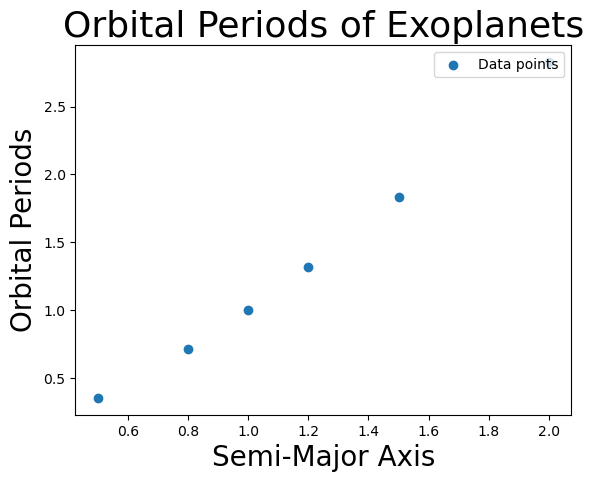

In [25]:
import matplotlib.pyplot as plt # Importing our graphing package.

semi_major_axes = [0.5, 1.0, 2.0, 1.5, 1.2, 0.8]

# Just going to copy my orbital period function here to make things simpler. 

def new_orbital_period(a):
    period = np.sqrt(np.power(a, 3))
    return period

orbital_periods = [] # Creating an empty array to which I will append my values for orbital period

for i in semi_major_axes: # For loop to calculate the orbital periods for all semi-major axes that I have. 
    period = new_orbital_period(i) # Runs the orbital period function on all values of semi-major axes.
    orbital_periods.append(period) # Appends these values to our empty array

plt.scatter(semi_major_axes, orbital_periods, label="Data points") # This is our scatter plot, and I add label inside to make the legend easier
plt.title("Orbital Periods of Exoplanets", fontdict={'fontsize':26}) # Title of our graph
plt.xlabel("Semi-Major Axis", fontdict={'fontsize': 20}) # X-axis label of our graph
plt.ylabel("Orbital Periods", fontdict={'fontsize': 20}) # Y-axis label of our graph
plt.legend(loc = 'upper right') # Function to display the legend
plt.show()

Create a bar plot of planet radii vs. their equilibrium temperatures. Label the axes, add a legend and add a title: "Equilibrium Temperatures vs. Radii."

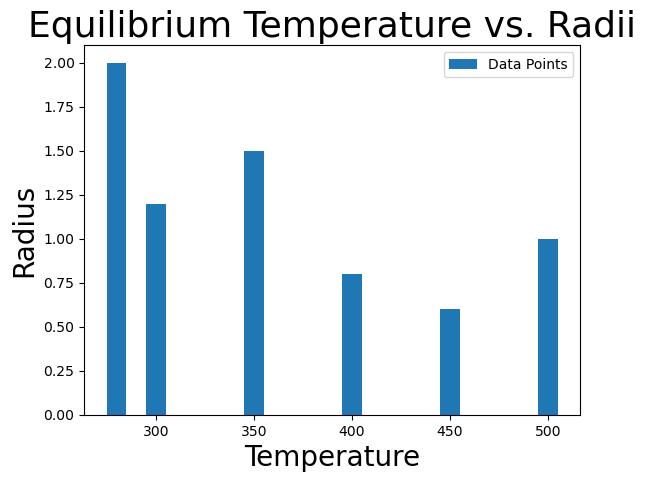

In [26]:
radii = [1.2, 0.8, 1.5, 2.0, 1.0, 0.6]
temperatures = [300, 400, 350, 280, 500, 450]

plt.bar(temperatures, radii, width=10, label = 'Data Points')
plt.title("Equilibrium Temperature vs. Radii", fontdict={'fontsize':26}) # Title of our graph
plt.xlabel("Temperature", fontdict={'fontsize': 20}) # X-axis label of our graph
plt.ylabel("Radius", fontdict={'fontsize': 20}) # Y-axis label of our graph
plt.legend(loc = 'upper right') # Function to display the legend
plt.show()

Put the scatter plot and bar plot on the same figure (horizonatally). 

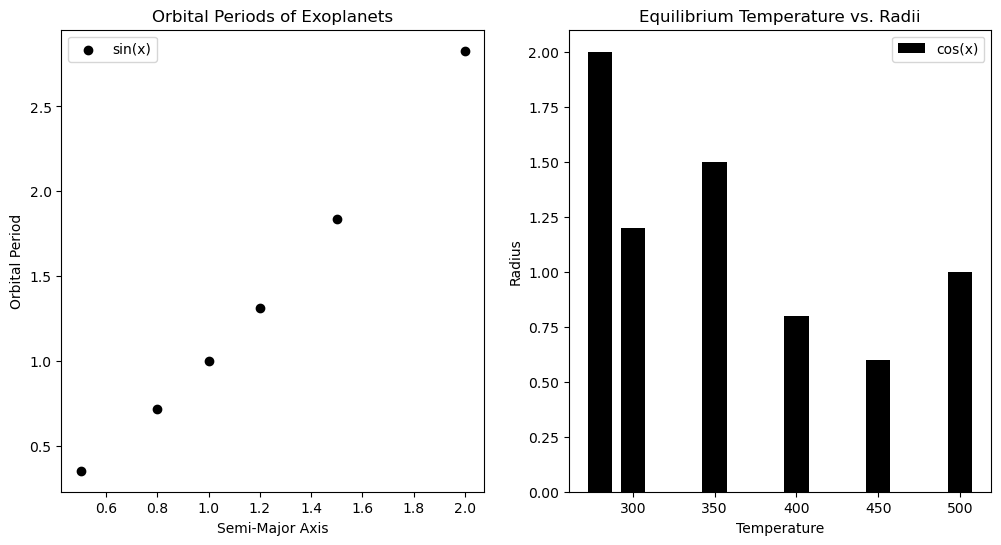

In [27]:
# Not sure what this is asking however I think it's to make a subplot:

figure, axs = plt.subplots(1, 2, figsize=(12,6)) # This will create 2 subplots, with one row and 2 columns, so both figures will be side by side.
    
axs[0].scatter(semi_major_axes, orbital_periods, color='black', label='sin(x)')
axs[0].set_title('Orbital Periods of Exoplanets')
axs[0].set_xlabel('Semi-Major Axis')
axs[0].set_ylabel('Orbital Period')
axs[0].legend()


axs[1].bar(temperatures, radii, width = 15, color='black', label='cos(x)')
axs[1].set_title('Equilibrium Temperature vs. Radii')
axs[1].set_xlabel('Temperature')
axs[1].set_ylabel('Radius')
axs[1].legend()

plt.show()

## 5 Modules
Choose a function from this homework and put it into a module. Import the module with the function below. Make sure to show the output.

In [28]:
import orbital as ob

x = ob.new_orbital_period(2) # This will find the orbital period of some object with semi-major axis = 2
print(x)

2.8284271247461903
